# Computational modeling of stem and progenitor cell kinetics identifies plausible hematopoietic lineage hierarchies 
## Results Comparison of Topologies and number of intermediate states - reduced data set (4 healthy individuals)

In [1]:
from __future__ import division
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as col
import matplotlib.patches as patches
from matplotlib import rc
from matplotlib.ticker import FuncFormatter, MaxNLocator
import scipy.io as sio
import fnmatch as fnm
import h5py
import math
import os
import re
%matplotlib inline

#### specify path were results can be found and figures should be saved

In [9]:
os.chdir('../')
#os.chdir('/Users/lisa.bast/Documents/MATLAB_WD/class_1/HematopoiesisAnalysis/AnalysisAndModeling/BulkAnalysis/Lineage_Hierarchy_Comparison/Model_Selection')

In [10]:
dir_str = os.getcwd()

In [11]:
print(dir_str)

/Users/lisa.bast/Documents/MATLAB_WD/class_1/HematopoiesisAnalysis/AnalysisAndModeling/BulkAnalysis/Lineage_Hierarchy_Comparison/Model_Selection


#### specify if figures should be saved

In [12]:
opt_save = True

#### load defined functions

In [13]:
os.chdir(dir_str)
%run 'defined_functions.ipynb'

#### define colors and compartments

In [14]:
CT = ['HSC','MPP','MLP','CMP','GMP','MEP','mat']
cols_CT = sns.color_palette(['#CC0000','#FF8000','#003366','#6600CC','#00994C','#57D7F7','#FFE00E','#A0A0A0']);

#group_str = ['MDS','MDS_ASXL1','MDS_SF3B1','MDS_SF3B1_TET2','MDS_SF3B1_ASXL1','healthy']
#cols_group = ['#FF0000','#FF3399', '#FD8002', '#AD07E3', '#A61919', '#194795'];

colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000']

In [15]:
plt = loadPltSettings(20,10) #fonsize, markersize

In [16]:
N_is = range(1,5+1)
#N_is = range(1,3+1)
#N_is.append(5)
#N_is.append(10)
#print(N_is)

noise_type = 'LogNormal'
#noise_type = 'LogLaplace'

folder_str = []
for N_ID in N_is:
    folder_str.append("/results_hierarchy_comparison_BIC_7divs_"+str(N_ID)+"iS_HO_"+noise_type+"_fit_iC")

M_names = list('ABCDEFGHIJ')
subfolder_str = []
model_str = list()
for M_ID in M_names:
    subfolder_str.append("/model_"+M_ID+"_model/")
    model_str.append("model_"+M_ID)

I_names = ['482_1','522_1','353_1','559_1']#'345_1','560_1'
N_indi = len(I_names)
subsubfolder_str = []
for I_ID in I_names:
    subsubfolder_str.append("individual_"+I_ID)
      
results_str = dir_str + "/results_hierarchy_comparison_BIC_7divs_allNiS_HO_"+noise_type+"_fit_iC/"   
try:  
    os.mkdir(results_str)
except OSError:  
    print ("Creation of the directory %s failed" % results_str)
else:  
    print ("Successfully created the directory %s " % results_str)
    
opt_all = False
bool_fit_repetitions_seperately = True
last_SSF_str = subsubfolder_str[-1] #['/'+subsubfolder_str_i for subsubfolder_str_i in subsubfolder_str]

Creation of the directory /Users/lisa.bast/Documents/MATLAB_WD/class_1/HematopoiesisAnalysis/AnalysisAndModeling/BulkAnalysis/Lineage_Hierarchy_Comparison/Model_Selection/results_hierarchy_comparison_BIC_7divs_allNiS_HO_LogNormal_fit_iC/ failed


In [17]:
N_is

range(1, 6)

### Which model performs best?

#### BIC values per hierarchy and indiviudual for the number of intermediate states ranging from 1 to 5 and n_is=10

In [18]:
bool_intermedStates=True
[Scores_BIC, Scores_BIC_all] = getScores(dir_str,folder_str,subfolder_str,subsubfolder_str,'healthy','','BIC',bool_fit_repetitions_seperately,bool_intermedStates)

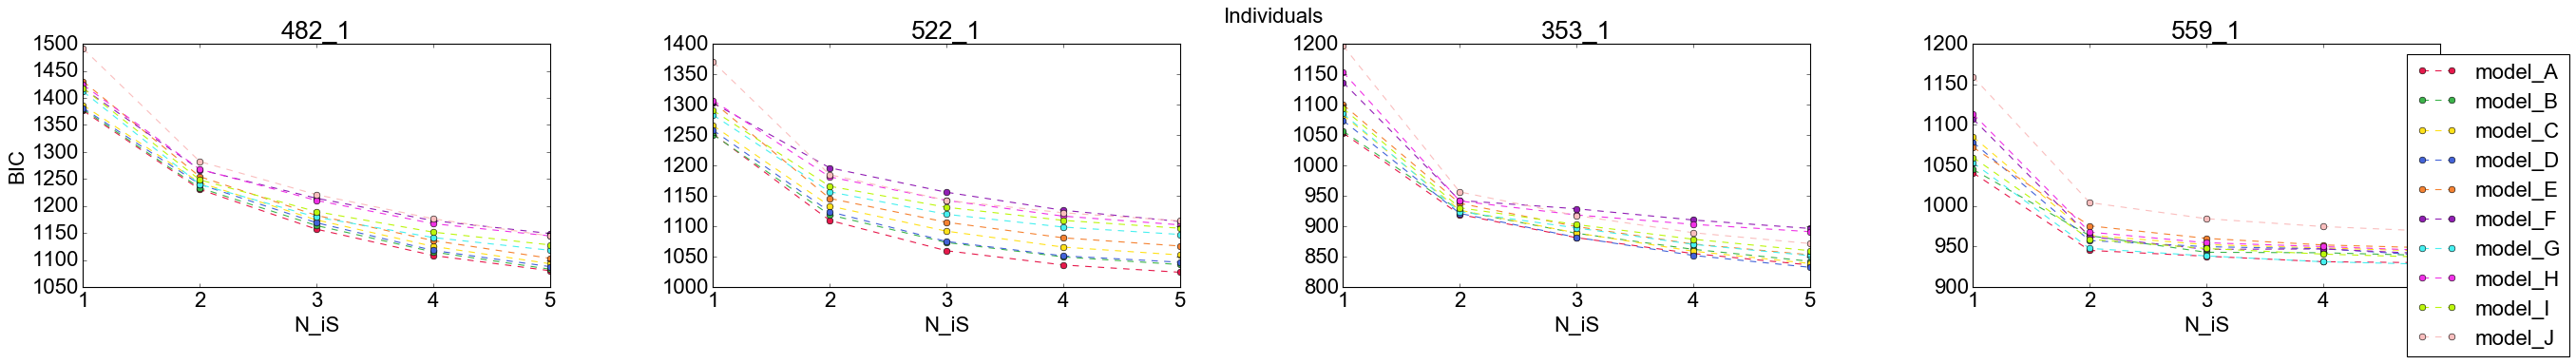

In [19]:
plot_scores_vs_nis_per_model_and_individual(subsubfolder_str,model_str,N_is,Scores_BIC,'BIC',results_str,True,bool_fit_repetitions_seperately,opt_save)

In [20]:
#plot_scores_vs_nis_per_model_and_individual(subsubfolder_str,model_str,N_is,Scores_BIC,'BIC',results_str,False,bool_fit_repetitions_seperately,opt_save)

#### BIC values per hierarchy for all 6 indiviuduals for the number of intermediate states ranging from 1 to 5

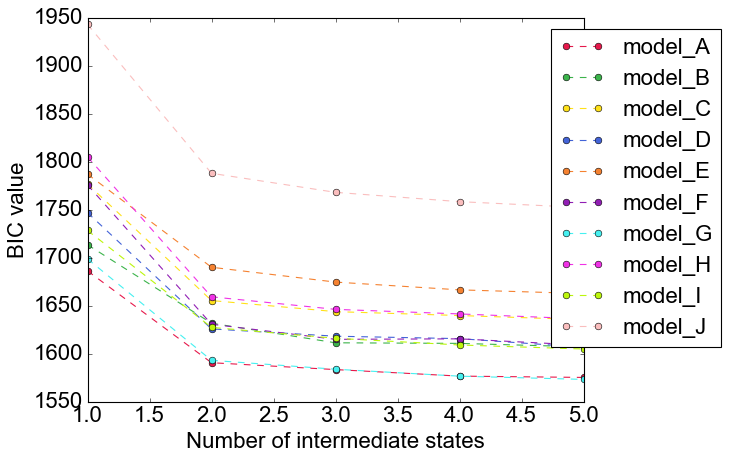

In [21]:
plot_scores_vs_nis_per_model(model_str,N_is,Scores_BIC_all,'BIC',results_str,False,opt_save)

In [22]:
[LOGL, LOGL_all] = getScores(dir_str,folder_str,subfolder_str,subsubfolder_str,'healthy','','LOGL',bool_fit_repetitions_seperately,bool_intermedStates)

In [23]:
#L = np.matrix(LOGL)
#L[:,0]

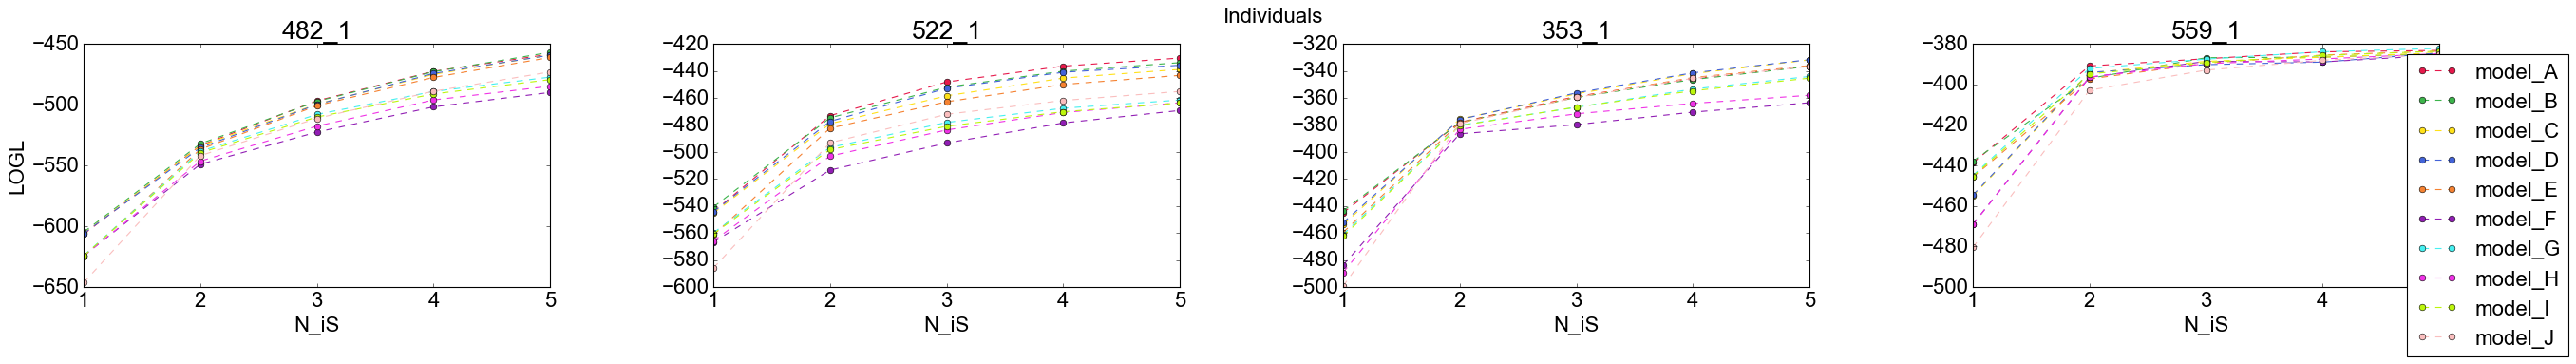

In [24]:
plot_scores_vs_nis_per_model_and_individual(subsubfolder_str,model_str,N_is,LOGL,'LOGL',results_str,True,bool_fit_repetitions_seperately,opt_save)

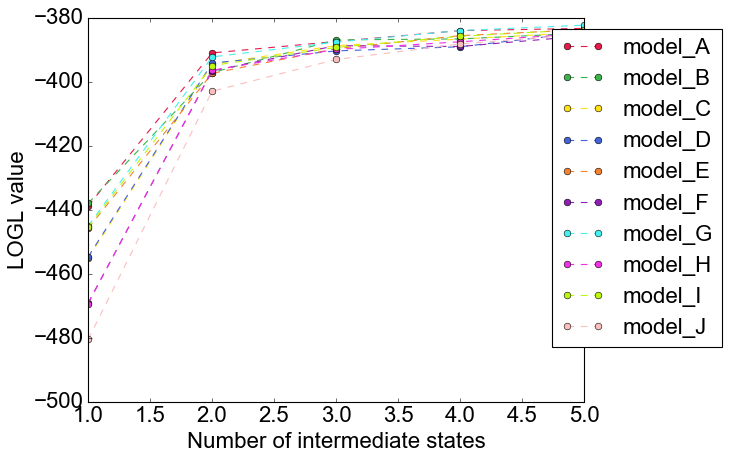

In [25]:
plot_scores_vs_nis_per_model(model_str,N_is,LOGL_all,'LOGL',results_str,False,opt_save)

average increase/ decrease of logL (between n_is and n_is + 1) per n_is increase:

In [26]:
os.chdir(dir_str)
%run 'defined_functions.ipynb'

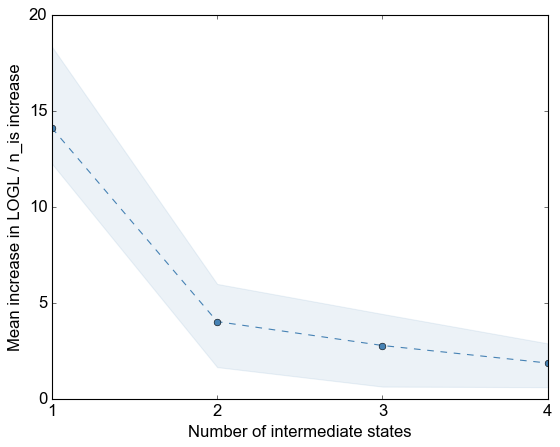

In [27]:
plt = loadPltSettings(15,10) #fonsize, markersize
plot_change_in_Score(LOGL,'LOGL',I_names,M_names,N_is,results_str,False,colors,opt_save)

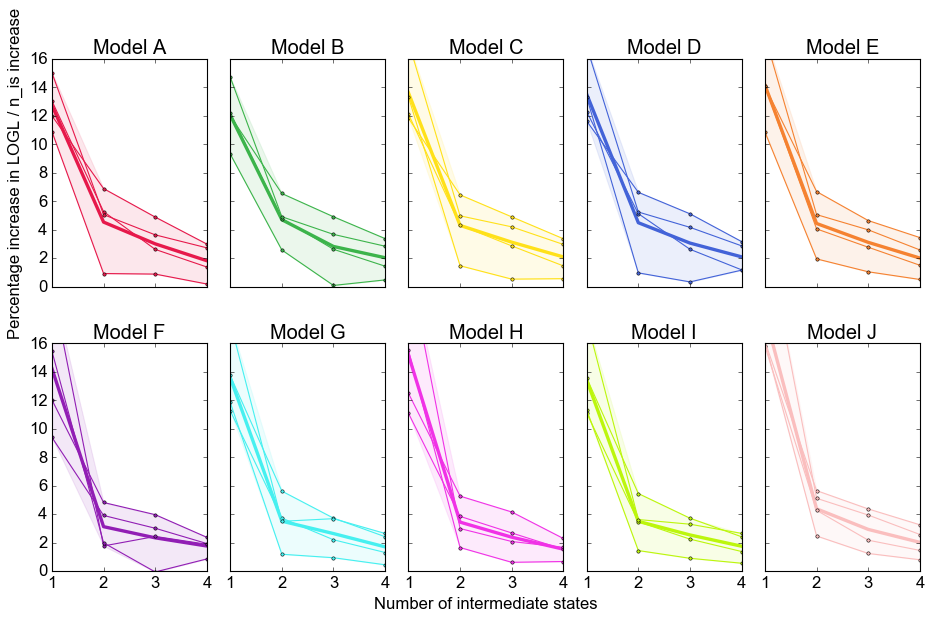

In [28]:
plot_change_in_Score(LOGL,'LOGL',I_names,M_names,N_is,results_str,True,colors,opt_save)

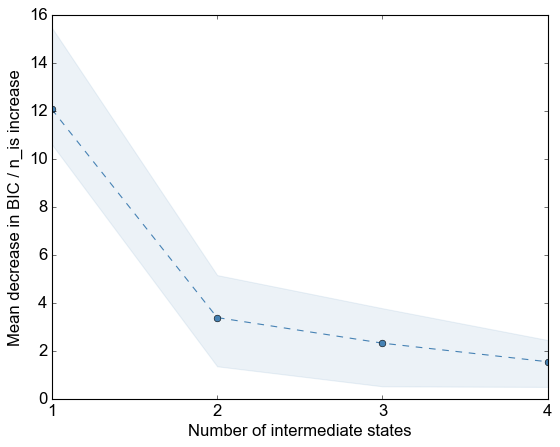

In [29]:
plt = loadPltSettings(15,10) #fonsize, markersize
plot_change_in_Score(Scores_BIC,'BIC',I_names,M_names,N_is,results_str,False,colors,opt_save)

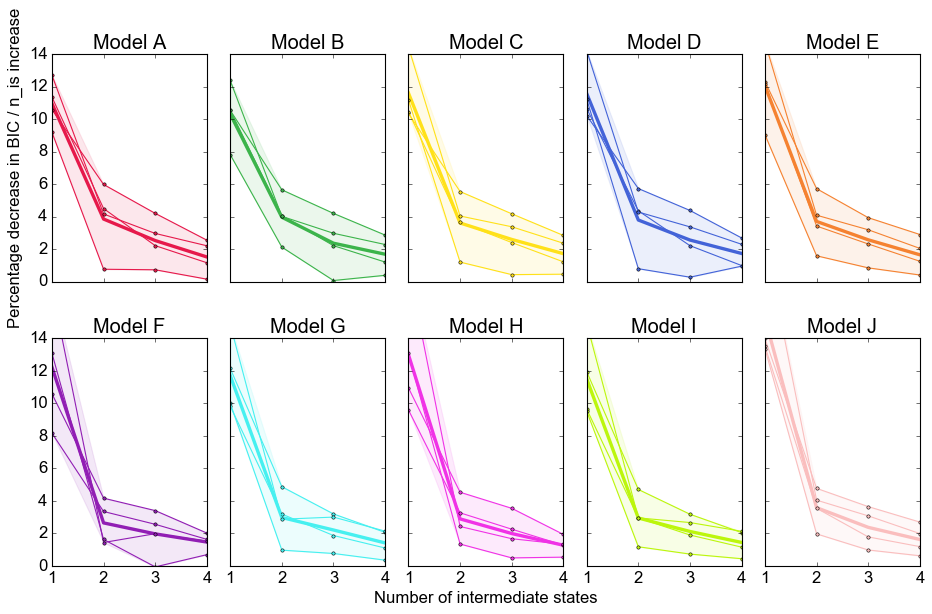

In [30]:
plot_change_in_Score(Scores_BIC,'BIC',I_names,M_names,N_is,results_str,True,colors,opt_save)

In [32]:
[Time_in_min, Time_in_min_all] = getScores(dir_str,folder_str,subfolder_str,subsubfolder_str,'healthy','','TIME',bool_fit_repetitions_seperately,bool_intermedStates)
[Time_cpu_in_min, Time_cpu_in_min_all] = getScores(dir_str,folder_str,subfolder_str,subsubfolder_str,'healthy','','TIME_CPU',bool_fit_repetitions_seperately,bool_intermedStates)

In [33]:
#Time_cpu_in_min

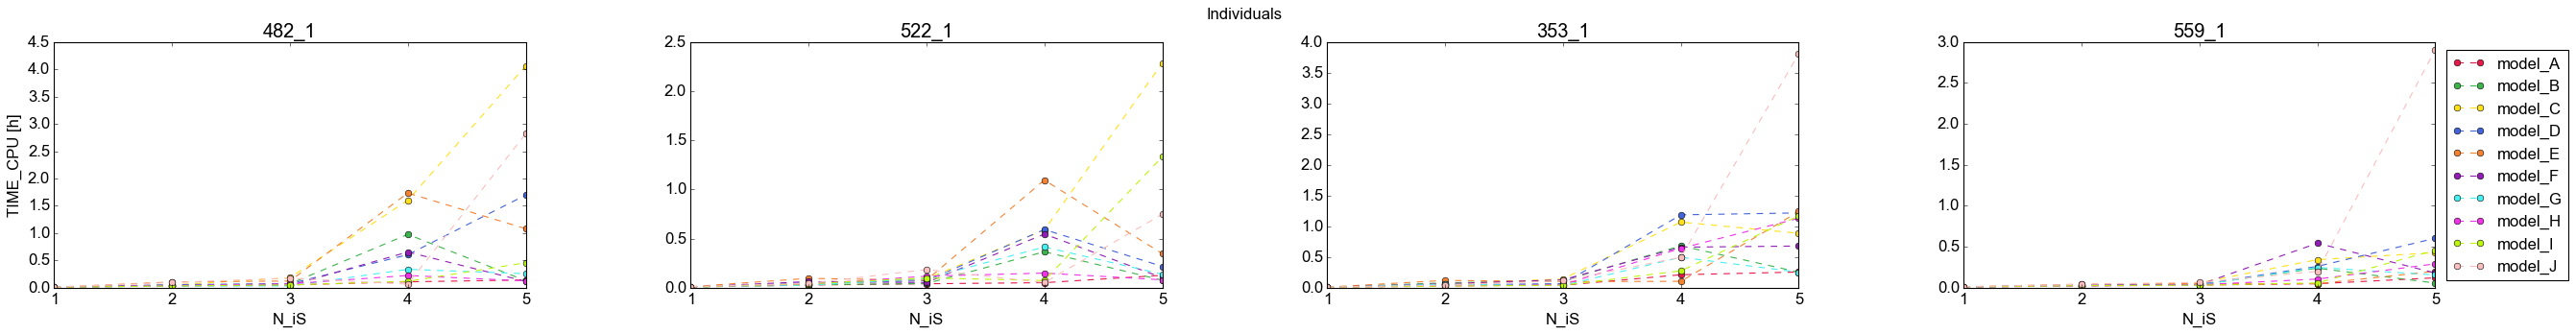

In [34]:
plot_scores_vs_nis_per_model_and_individual(subsubfolder_str,model_str,N_is,Time_cpu_in_min/60,'TIME_CPU',results_str,True,bool_fit_repetitions_seperately,opt_save)

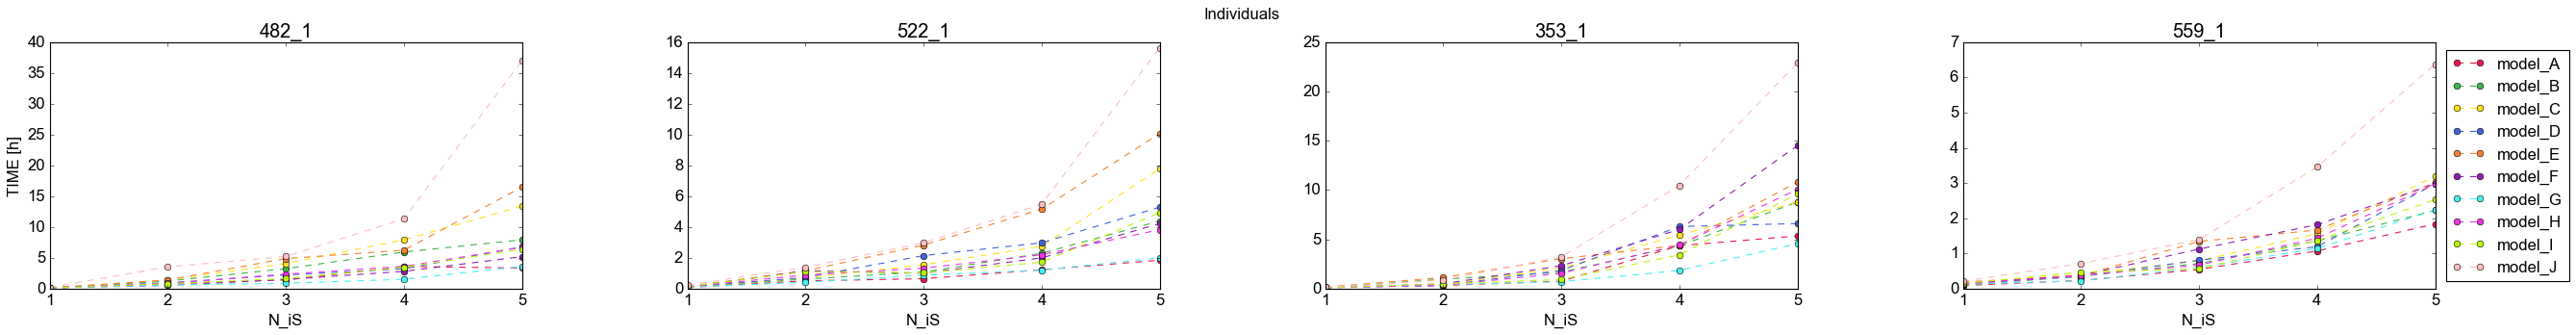

In [35]:
plot_scores_vs_nis_per_model_and_individual(subsubfolder_str,model_str,N_is,Time_in_min/60,'TIME',results_str,True,bool_fit_repetitions_seperately,opt_save)

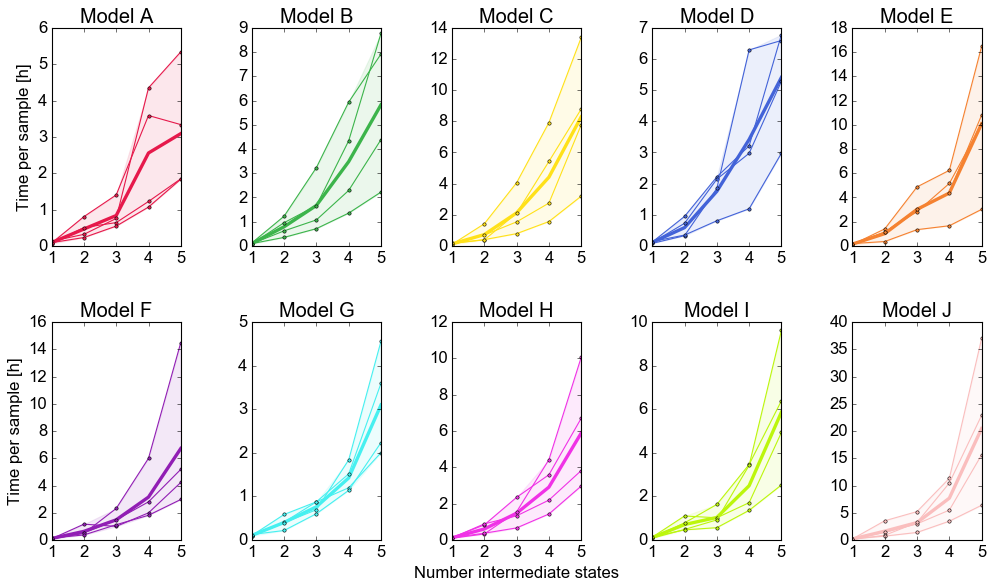

In [36]:
N_indi = len(I_names)
plot_time_vs_Nis(Time_in_min_all/60,Time_in_min/60,M_names,N_is,N_indi,results_str,colors,opt_save)

### Practically identifiable parameters

In [37]:
last_SSF_str

'individual_559_1'

In [89]:
def plot_par_with_CI_vs_N_is(DF,results_str, model, individual, N_is_list, states, par_transformation, colors, opt_save):
    
    rate_names = DF.columns[np.logical_and(np.logical_and(np.logical_and(np.logical_and(np.logical_and(np.logical_and(np.logical_and(DF.columns!='Model', DF.columns!='Sample_ID_long'),DF.columns!='N_is'),DF.columns!='Sample_ID'),DF.columns.str.endswith('CI_l')==False),DF.columns.str.endswith('CI_u')==False),DF.columns.str.endswith('_min')==False),DF.columns.str.endswith('_max')==False)]
    print(rate_names)
    W=0.2
    markerSize=15
    bool_plot_legend=True
    alpha_val=0.5
    
    #define thresholds
    TH_groups = 2#5 # min of identifiable parameters within group to draw plot
    TH_total = 2#7 # min of identifiable parameters to draw plot
    
    
    #define positions for text, number of columns and rows
    n_cols = 6
    x_d = 0.34
    x_p = 0.69
    x_a = 0.84    
    n_rows = len(states)
    
            
    f, axes = plt.subplots(n_rows, n_cols, figsize=(55, 65))
    f.subplots_adjust(hspace = .25, wspace = 0.4)
    f.patch.set_facecolor('white')

    s_id = 0 #states
    while s_id < len(CT):
        cols_del = list()
        col_counter = 0
        for r_id,rate in enumerate(rate_names):
            a_m = fnm.fnmatch(rate,'a_'+ CT[s_id] +'*')
            b_m = fnm.fnmatch(rate,'b_'+ CT[s_id] +'*')
            g_m = fnm.fnmatch(rate,'g_'+ CT[s_id] +'*')
            #if (not all(np.isnan(DF[rate]))) and (a_m or b_m or g_m):
            if (a_m or b_m or g_m):
                if a_m:
                    col = col_counter
                    col_counter = col_counter+1
                if b_m:
                    col = n_cols-2
                if g_m:
                    col = n_cols-1

                #plot CIs:
                if par_transformation is not 'ratio':
                    if not bool_test_par:
                        for N_ID,N_is in enumerate(N_is_list):
                            H = DF[(DF['N_is']==N_is) & (DF['Model']==model)][rate+'_CI_u']-DF[(DF['N_is']==N_is) & (DF['Model']==model)][rate+'_CI_l']
                            print(H)
                            axes[s_id,col].add_patch(patches.Rectangle((N_is - W/2 ,DF[(DF['N_is']==N_is) & (DF['Model']==model)][rate+'_CI_l']), width=W, height=H,color=colors[0],alpha=alpha_val,label='95% confidence interval' if N_ID==0 else ''))

                axes[s_id,col].plot(N_is_list,DF[(DF['Model']==model)][rate], linestyle='None', marker = 'o', ms=markerSize, color=colors[0], label='rate estimate')
                x_lim = axes[s_id,col].get_xlim()

                # axes limits and labels:
                # axes[s_id,col].set_xlabel("Sample ID")
                if par_transformation is 'ratio':
                    axes[s_id,col].set_ylabel('1/' + rate_names[r_id])
                elif par_transformation is 'lin':
                    axes[s_id,col].set_ylabel(rate_names[r_id])
                else:
                    axes[s_id,col].set_ylabel(par_transformation + '(' + rate_names[r_id] + ')')
                #if par_transformation!='lin':
                #print(rate)
                #print([np.min(DF[rate+'_min']), np.max(DF[rate+'_max'])])
                axes[s_id,col].set_ylim([np.min(DF[(DF['Model']==model)]['b_HSC_min']), np.max(DF[(DF['Model']==model)]['b_HSC_max'])])
                axes[s_id,col].set_xlabel('N_is')

                if bool_plot_legend==True:
                    axes[s_id,col].legend(bbox_to_anchor=(2, 1),numpoints=1)
                    bool_plot_legend=False
                else: 
                    axes[s_id,col].legend_ = None

            else:   
                if col_counter not in cols_del:
                    cols_del.append(col_counter)

        if r_id==len(rate_names)-1:
            for i_cd in range(max(cols_del),n_cols-2):
                f.delaxes(axes[s_id,i_cd])
            if CT[s_id]=='MLP':
                f.delaxes(axes[s_id,n_cols-1])
        s_id = s_id+1 #states

    # figure settings   
    f.text(0.03, 0.5, 'Model states', va='center', rotation='vertical',fontsize=40)
    if par_transformation  is 'ratio':
        string1 = 'Times for Model ' + model[-1]
    else:
        string1 = 'Rates for Model ' + model[-1]
    f.text(0.45, 0.95, string1, va='center')
    f.text(x_d, 0.93, 'differentiation', va='center')
    f.text(x_p, 0.93, 'proliferation', va='center')
    f.text(x_a, 0.93, 'apoptosis', va='center')

    #save figure    
    if opt_save:
        fig = plt.gcf()
        fig.savefig(results_str + '/' + 'ParameterWithCIs_vs_N_is_'+ par_transformation + '_' + model + '_' + individual + '.svg', bbox_inches="tight")
        fig.savefig(results_str + '/' + 'ParameterWithCIs_vs_N_is_'+ par_transformation + '_' + model + '_' + individual +'.pdf', bbox_inches="tight")
    plt.show()

In [90]:
par_transformation='log10'
bool_identifiablePars_only=False
bool_weights=False
bool_test_par=False
bool_CIs=True
bool_boundaries=True
bool_fit_repetitions_seperately = False
#for m_id in range(0,len(subfolder_str)):
m_id=1
for n_is in range(0,len(folder_str)):
    DF_TMP=[]
    MATLAB_str = dir_str+folder_str[n_is]+subfolder_str[m_id];
    DF_TMP,rate_names_opt = get_par_estimates(MATLAB_str, last_SSF_str, M_names[m_id], CT, par_transformation,bool_identifiablePars_only,bool_weights,bool_test_par,bool_CIs,bool_boundaries,bool_fit_repetitions_seperately);
    DF_TMP.insert(2, "N_is", N_is[n_is]*np.ones((1,len(DF_TMP))).flatten(), True);
    if n_is==0 and m_id==0:
        DF_nis = DF_TMP.copy();
    else:
        DF_nis = pd.concat(objs = [DF_nis,DF_TMP],axis=0,ignore_index=True,sort=False);


In [91]:
I_list = DF_nis['Sample_ID'].unique()
N_is_list = DF_nis['N_is'].unique()
N_is_list

array([1., 2., 3., 4., 5.])

In [95]:
DF_nis[(DF_nis['Model']=='model_B')]

,Model,N_is,Sample_ID,Sample_ID_long,a_CMP_GMP,a_CMP_GMP_CI_l,a_CMP_GMP_CI_u,a_CMP_GMP_max,a_CMP_GMP_min,a_CMP_MEP,...,g_MPP,g_MPP_CI_l,g_MPP_CI_u,g_MPP_max,g_MPP_min,g_mat,g_mat_CI_l,g_mat_CI_u,g_mat_max,g_mat_min
20,model_B,1.0,H482_1,H482_1,-2.698970,-2.698970,-0.596272,0.0,-2.69897,-2.214126,...,-2.698970,-2.698970,0.000000,0.0,-2.69897,-2.69897,-2.69897,0.000000,0.0,-2.69897
21,model_B,1.0,H522_1,H522_1,-2.290714,-2.698970,-0.348776,0.0,-2.69897,-1.798858,...,-2.698970,-2.698970,0.000000,0.0,-2.69897,-2.69897,-2.69897,0.000000,0.0,-2.69897
22,model_B,1.0,H353_1,H353_1,-2.698970,-2.698970,-0.684908,0.0,-2.69897,-2.148923,...,-2.698970,-2.698970,0.000000,0.0,-2.69897,-2.69897,-2.69897,0.000000,0.0,-2.69897
23,model_B,1.0,H559_1,H559_1,-2.604517,-2.698970,0.000000,0.0,-2.69897,-2.099389,...,-2.698970,-2.698970,0.000000,0.0,-2.69897,-2.69897,-2.69897,0.000000,0.0,-2.69897
24,model_B,2.0,H482_1,H482_1,-2.698970,-2.698970,0.000000,0.0,-2.69897,-1.206775,...,-1.229733,-2.638042,0.000000,0.0,-2.69897,-2.69897,-2.69897,-1.008820,0.0,-2.69897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,model_B,4.0,H559_1,H559_1,-2.698970,-2.698970,0.000000,0.0,-2.69897,-2.698970,...,-1.067134,-1.455615,-0.678652,0.0,-2.69897,-2.69897,-2.69897,-0.045706,0.0,-2.69897
196,model_B,5.0,H482_1,H482_1,-2.698970,-2.698970,0.000000,0.0,-2.69897,-1.082969,...,-1.560846,-1.780593,-1.341100,0.0,-2.69897,-2.69897,-2.69897,-2.001386,0.0,-2.69897
197,model_B,5.0,H522_1,H522_1,-2.698970,-2.698970,0.000000,0.0,-2.69897,-0.861679,...,-1.490886,-1.830845,-1.150927,0.0,-2.69897,-2.69897,-2.69897,-1.795259,0.0,-2.69897
198,model_B,5.0,H353_1,H353_1,-1.437626,-1.666862,-1.208391,0.0,-2.69897,-0.611359,...,-2.698970,-2.698970,-2.128273,0.0,-2.69897,-2.69897,-2.69897,-0.800424,0.0,-2.69897


Index(['a_CMP_GMP', 'a_CMP_MEP', 'a_GMP_mat', 'a_HSC_MPP', 'a_MEP_mat',
       'a_MLP', 'a_MLP_GMP', 'a_MPP_CMP', 'a_MPP_MLP', 'b_CMP', 'b_GMP',
       'b_HSC', 'b_MEP', 'b_MLP', 'b_MPP', 'b_mat', 'g_CMP', 'g_GMP', 'g_HSC',
       'g_MEP', 'g_MPP', 'g_mat'],
      dtype='object')
Series([], dtype: float64)


ValueError: setting an array element with a sequence.

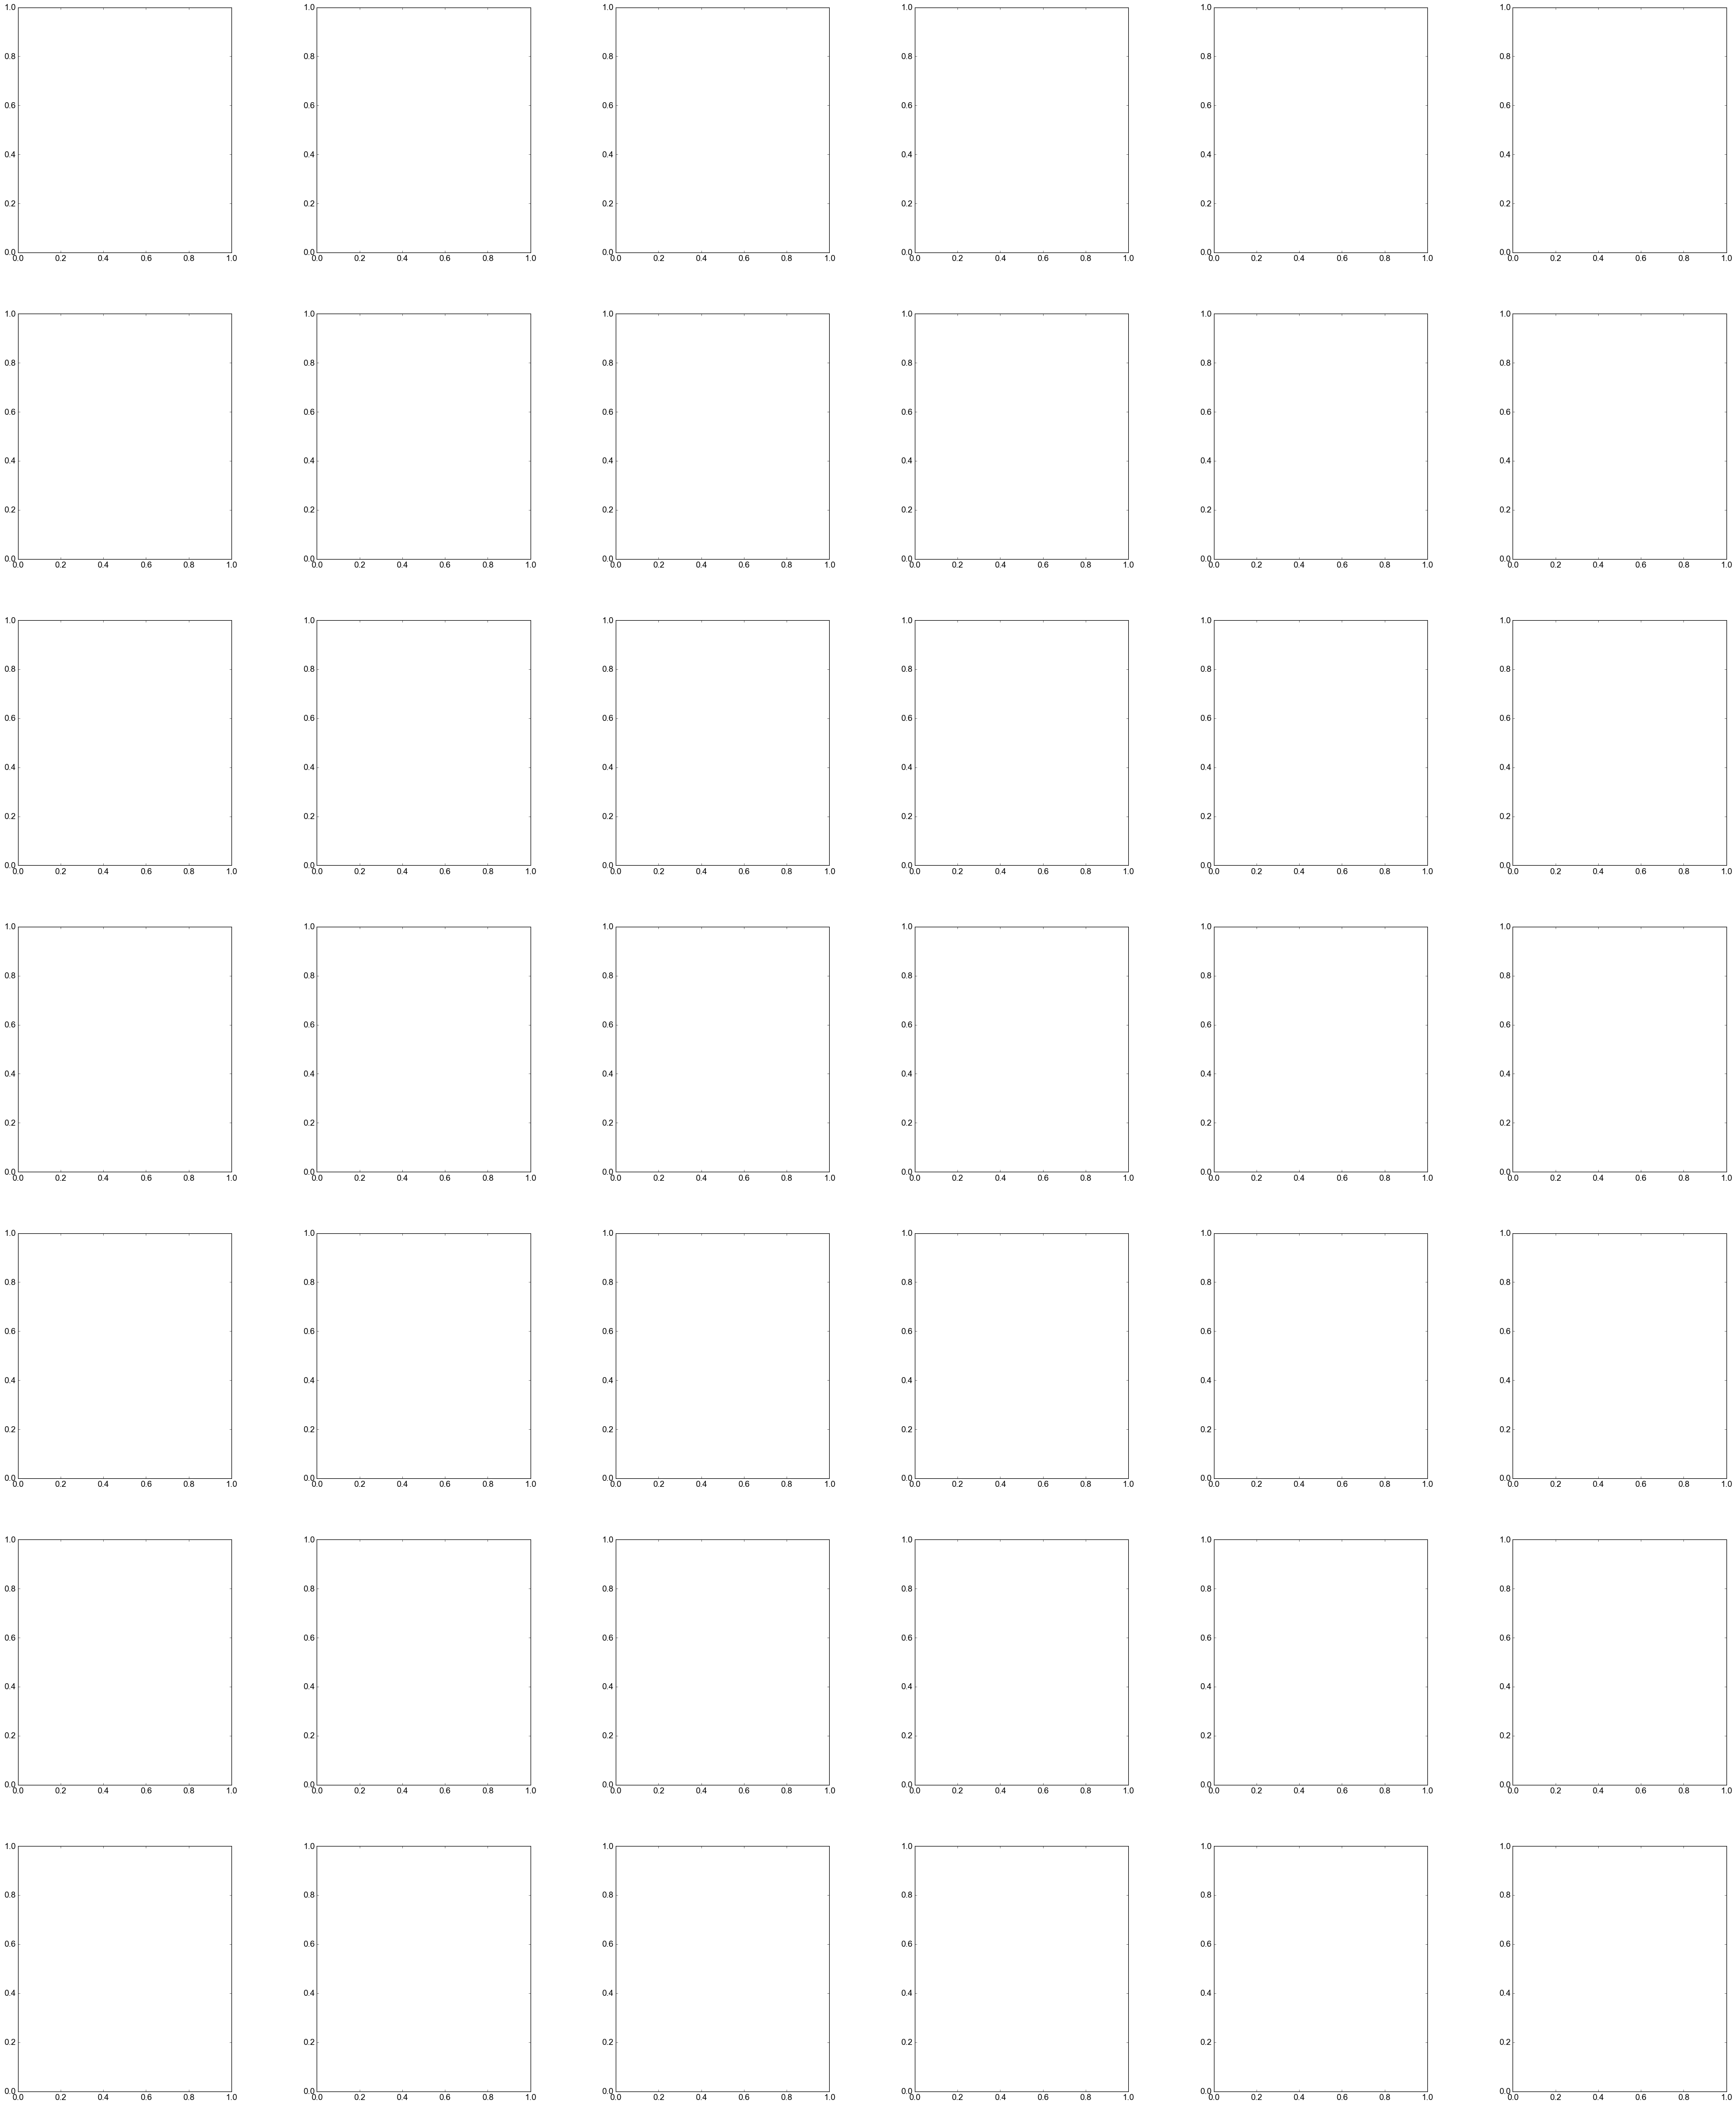

In [92]:
#plot pars for range of N_is:
#I_list = DF_nis['Sample_ID'].unique()
#N_is_list = DF_nis['N_is'].unique()
for i_id,individual in enumerate(I_list):
    DF_S = DF_nis[(DF_nis['Sample_ID']==individual)].copy()
    plot_par_with_CI_vs_N_is(DF_S, results_str, M_names[m_id], individual, N_is_list, CT, par_transformation, colors, opt_save)
if m_id==0:
    DF_PAR = DF_nis.copy()
else:
    DF_PAR.concat(objs = [DF_PAR,DF_nis],axis=0,ignore_index=True);

In [72]:
DF_PAR.head(5)

,Model,Sample_ID_long,N_is,Sample_ID,a_HSC_MPP,a_HSC_MPP_CI_l,a_HSC_MPP_CI_u,a_HSC_MPP_min,a_HSC_MPP_max,b_HSC,...,b_mat,b_mat_CI_l,b_mat_CI_u,b_mat_min,b_mat_max,g_mat,g_mat_CI_l,g_mat_CI_u,g_mat_min,g_mat_max
0,model_A,H482_1,1.0,H482_1,-2.698970,-2.698970,-1.601429,-2.69897,0.0,-1.967547,...,-1.604987,-1.785516,-1.424457,-2.69897,0.0,-2.69897,-2.69897,0.000000,-2.69897,0.0
1,model_A,H522_1,1.0,H522_1,-2.412327,-2.698970,-1.429106,-2.69897,0.0,-1.808314,...,-1.512360,-1.674216,-1.350505,-2.69897,0.0,-2.69897,-2.69897,0.000000,-2.69897,0.0
2,model_A,H353_1,1.0,H353_1,-2.685306,-2.698970,-1.824631,-2.69897,0.0,-2.350994,...,-1.735812,-1.873660,-1.597963,-2.69897,0.0,-2.69897,-2.69897,0.000000,-2.69897,0.0
3,model_A,H559_1,1.0,H559_1,-2.698970,-2.698970,-1.698365,-2.69897,0.0,-2.110346,...,-1.340788,-1.895208,-0.786369,-2.69897,0.0,-2.69897,-2.69897,0.000000,-2.69897,0.0
4,model_A,H482_1,2.0,H482_1,-1.401034,-1.521751,-1.280318,-2.69897,0.0,-1.271924,...,-1.288473,-1.336092,-1.240854,-2.69897,0.0,-2.69897,-2.69897,-2.017501,-2.69897,0.0


In [ ]:
np.unique(DF_PAR['Sample_ID'])

In [ ]:
rate_names = DF_PAR.columns[np.logical_and(np.logical_and(np.logical_and(np.logical_and(np.logical_and(np.logical_and(np.logical_and(DF_PAR.columns!='Model', DF_PAR.columns!='Sample_ID_long'),DF_PAR.columns!='N_is'),DF_PAR.columns!='Sample_ID'),DF_PAR.columns.str.endswith('CI_l')==False),DF_PAR.columns.str.endswith('CI_u')==False),DF_PAR.columns.str.endswith('_min')==False),DF_PAR.columns.str.endswith('_max')==False)]

In [ ]:
rate_names

percentage of identifiable parameters:

In [ ]:
m=subfolder_str[0]

In [ ]:
np.array(rate_names,dtype=str)

In [ ]:
DF_PAR

In [ ]:
identifiable_counts = np.zeros((len(subfolder_str),len(N_is),N_indi),dtype=float)
identifiable_percent = np.zeros((len(subfolder_str),len(N_is),N_indi),dtype=float)
#m_id=0
#m=subfolder_str[m_id]
for m_id,m in enumerate(subfolder_str): 
    print(m)
    DF_PAR_m = DF_PAR[DF_PAR['Model']==m[1:8]].copy()
    rate_names_m=[]
    rate_names_m = np.array(DF_PAR_m.columns[np.logical_and(np.logical_and(np.logical_and(np.logical_and(np.logical_and(np.logical_and(np.logical_and(DF_PAR_m.columns!='Model', DF_PAR_m.columns!='Sample_ID_long'),DF_PAR_m.columns!='N_is'),DF_PAR_m.columns!='Sample_ID'),DF_PAR_m.columns.str.endswith('CI_l')==False),DF_PAR_m.columns.str.endswith('CI_u')==False),DF_PAR_m.columns.str.endswith('_min')==False),DF_PAR_m.columns.str.endswith('_max')==False)])
    identifiable_bools_m = np.zeros((len(N_is),len(rate_names_m),N_indi),dtype=bool)
    for n_is_id,n_is in enumerate(N_is):
    #n_is_id =0
    #n_is = N_is[n_is_id]
        for rate_id,rate in enumerate(rate_names_m):
            print(rate)
            identifiable_bools_m[n_is_id,rate_id,:] = np.array(np.logical_and(DF_PAR_m[(DF_PAR_m['N_is']==n_is)][rate+'_CI_u']<DF_PAR_m[(DF_PAR_m['N_is']==n_is)][rate+'_max'], DF_PAR_m[(DF_PAR_m['N_is']==n_is)][rate+'_CI_l']>DF_PAR_m[(DF_PAR_m['N_is']==n_is)][rate+'_min']))
        identifiable_counts[m_id,n_is_id,:] = np.sum(identifiable_bools_m[n_is_id,:,:], axis=0)
    identifiable_percent[m_id,:,:] = (identifiable_counts[m_id]*100)/len(rate_names_m)


In [ ]:
identifiable_bools_m[n_is_id,:,:]

In [ ]:
identifiable_counts

In [ ]:
(identifiable_counts[m_id]*100)/len(rate_names_m)

In [ ]:
rate_names_m
np.shape(identifiable_counts)
identifiable_percent

In [ ]:
plot_percentage_identifiable_parameters_per_intermediate_state(identifiable_percent,M_names,colors,opt_save)